In [ ]:
import os, mne, socket
from mne_bids import BIDSPath, read_raw_bids

%matplotlib qt

# Get the hostname
hostname = socket.gethostname()

if 'hpc' in hostname:
    # You are running your code on HPC
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    dataPath = os.path.join(os.sep, 'scratch', 'work', 'courses', 'PSYCH-GA-3405-2024fa')
elif hostname == 'sebastian_mac':
    # You are Sebastian
    # Setting up paths for data
    mydir = os.getcwd()
    path_parts = mydir.split(os.sep)
    idcs = [i for i, c in enumerate(mydir) if c == os.sep]
    dataPath = mydir[:idcs[-2]]
else:
    # You are running on your device with Google drive path
    # Define the paths and initialize Fieldtrip
    my_user_id = 'mdd9787'  # change this to your netID
    curr_dir = os.getcwd()
    path_parts = curr_dir.split(os.sep)
    base_dir = os.path.join(os.sep, *path_parts[:3])
    dataPath = os.path.join(base_dir, 'Library', 'CloudStorage', f'GoogleDrive-{my_user_id}@nyu.edu', 'My Drive', 'Coursework', 'EEG MEG methods', 'ClassData')

eegRoot = os.path.join(dataPath, 'EEGBids')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
## Load data
groupName = 'GroupD'  # Change group name to analyze different dataset (valid IDs: GroupA, GroupC, GroupD)
userName = 'mrugank'  # Make sure to ensure that you are writing to your derivatives 
taskName = 'oddball'

# Get subject code for your group
groupMap = {'GroupA': '001', 'GroupC': '003', 'GroupD': '004'}
subjCode = groupMap[groupName]

dataPath = os.path.join(eegRoot, f'sub-{subjCode}', 'eeg')
derivPath = os.path.join(eegRoot, 'derivatives', userName, 'preprocessing', f'sub-{subjCode}')

if not os.path.exists(derivPath):
    os.makedirs(derivPath)

saveRoot = f'sub-{subjCode}_task-{taskName}_'

In [4]:
# Load the data
raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
# Set channel types for EOG
raw.set_channel_types({'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'eog', 'EXG4': 'eog'})
# Remove unwanted channels
unwanted_channels = ['EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp']
raw.drop_channels(unwanted_channels)

/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_4282/1399084057.py:2: RuntimeWarning: The number of channels in the channels.tsv sidecar file (261) does not match the number of channels in the raw data file (272). Will not try to set channel names.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_4282/1399084057.py:2: RuntimeWarning: The unit for channel(s) Status has changed from NA to V.
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_4282/1399084057.py:2: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EXG1', 'EXG2', 'EXG3', 'EXG4']
  raw = read_raw_bids(BIDSPath(subject=subjCode, task=taskName, root=eegRoot), verbose=False)
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_4282/1399084057.py:2: RuntimeWarning: DigMon

<RawEDF | sub-004_task-oddball_eeg.bdf, 261 x 2347008 (4584.0 s), ~347 kB, data not loaded>

Reading 0 ... 2347007  =      0.000 ...  4583.998 secs...


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   20.0s finished


Using matplotlib as 2D backend.
Channels marked as bad:
none


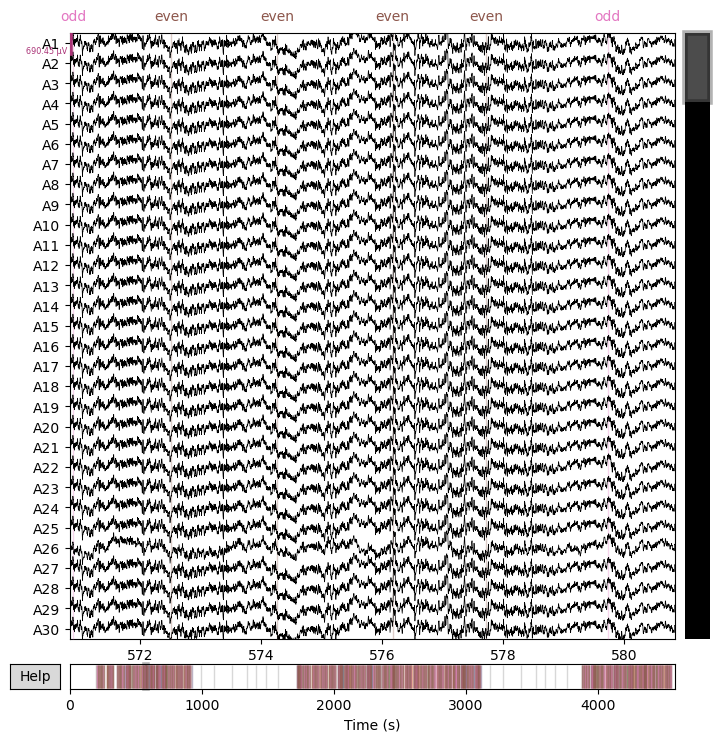

In [5]:
# Visualize the data
raw_copy = raw.copy()
raw_copy.load_data()
raw_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
raw_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

Reading 0 ... 2347007  =      0.000 ...  4583.998 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   18.3s finished


Channels marked as bad:
none


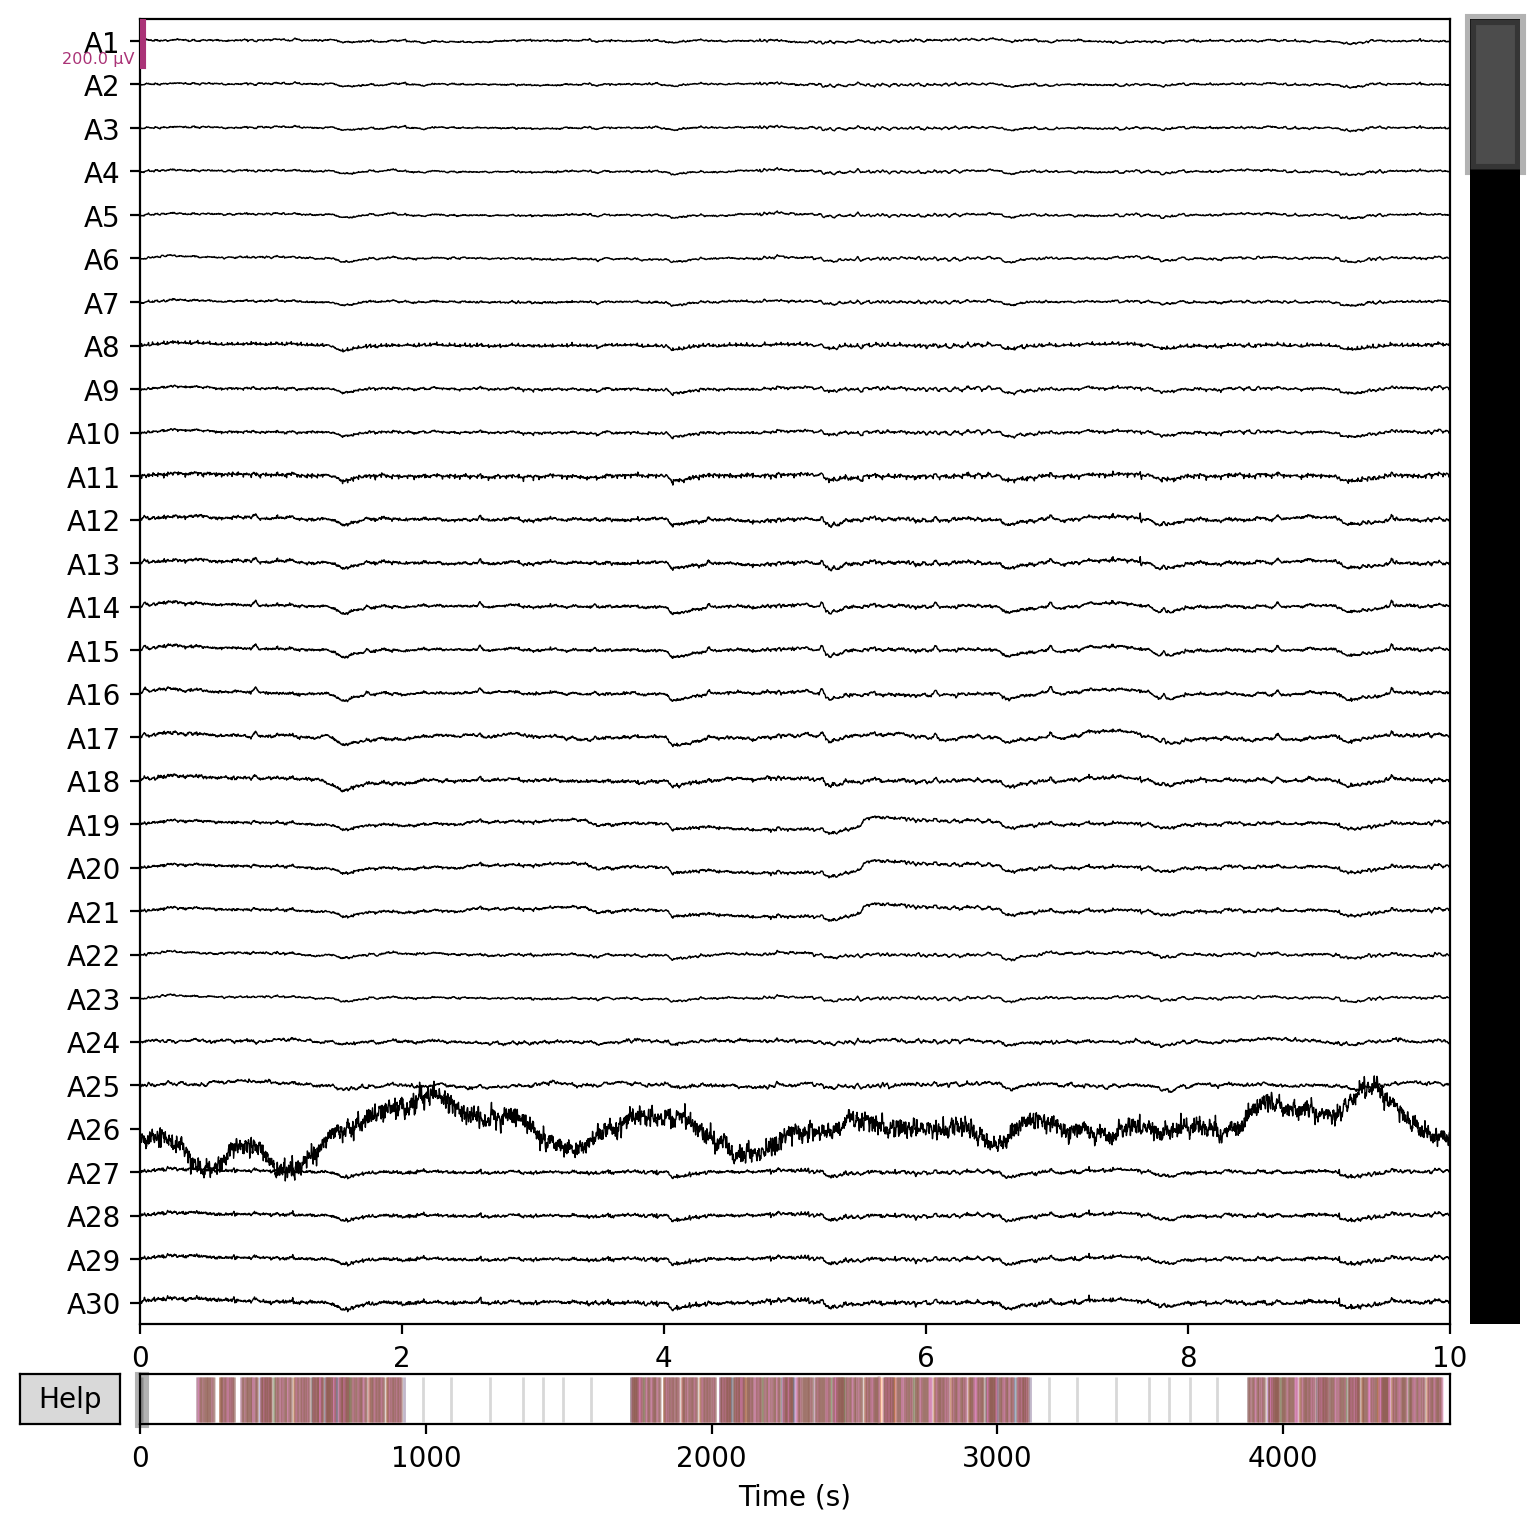

In [6]:
# First step is we re-reference the data to average reference
raw_avg = raw.copy()
raw_avg.load_data()
raw_avg.set_eeg_reference(ref_channels='average')
# Visualize the data
raw_avg_copy = raw_avg.copy()
raw_avg_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
raw_avg_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

In [4]:
# Identify bad channels
# B7, 9, 25?, C18?, G30?, F2, E5
bad_channels = ['A26', 'B2', 'B3', 'B4', 'B7', 'B8', 'B19', 
                'C9', 'C30', 'D15', 'E5', 'F2', 'F22', 'G25', 'G29']

# go back one step and interpolate
# then re-reference again!
# then epoch the data

In [8]:
# Interpolate bad channels
raw_interp = raw.copy()
raw_interp.load_data()
raw_interp.info['bads'] += bad_channels
raw_interp.interpolate_bads()

# Visualize the data
# raw_interp_copy = raw_interp.copy()
# raw_interp_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
# raw_interp_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

# Re-reference the data
raw_interp.set_eeg_reference(ref_channels='average')

Reading 0 ... 2347007  =      0.000 ...  4583.998 secs...


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 92320.6 mm
Computing interpolation matrix from 241 sensor positions
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Interpolating 15 sensors


/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_72085/2170194166.py:5: RuntimeWarning: Estimated head radius (9232.1 cm) is above the 99th percentile for adult head size.
  raw_interp.interpolate_bads()
/var/folders/0w/p5w49zc93976_p2hxj1zws2w0000gn/T/ipykernel_72085/2170194166.py:5: RuntimeWarning: (X, Y) fit (9367.1, 12.6) more than 20 mm from head frame origin
  raw_interp.interpolate_bads()


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | sub-004_task-oddball_eeg.bdf, 261 x 2347008 (4584.0 s), ~4.56 GB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   21.8s finished


Channels marked as bad:
none


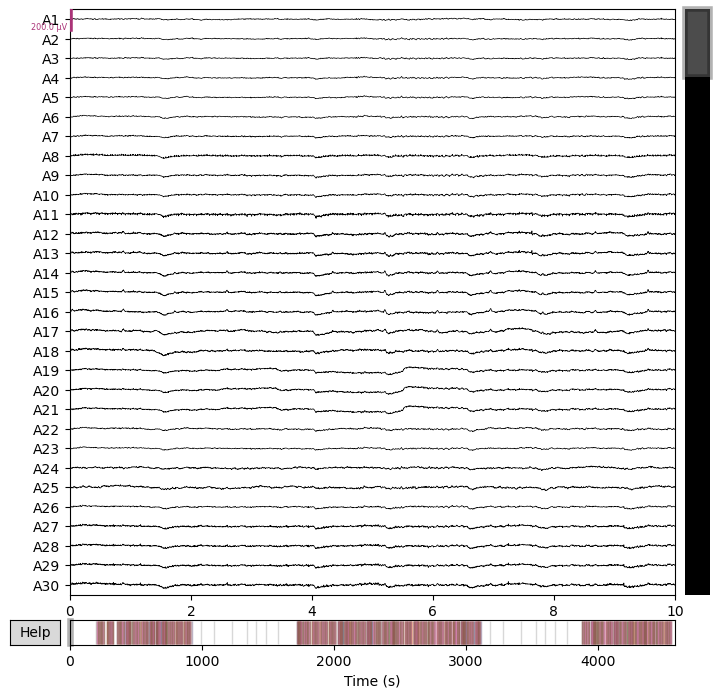

In [9]:
# Check the data again to see if we should exclude more channels
# if so .. go back to previous step
raw_interp_copy = raw_interp.copy()
raw_interp_copy.filter(l_freq=0.5, h_freq=None, n_jobs=-1)
raw_interp_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

In [10]:
# Average reference the data again
raw_interp.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Writing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_preproc-raw.fif
Closing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_preproc-raw.fif
Writing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_preproc-raw-1.fif
Closing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_preproc-raw-1.fif
[done]


Channels marked as bad:
none


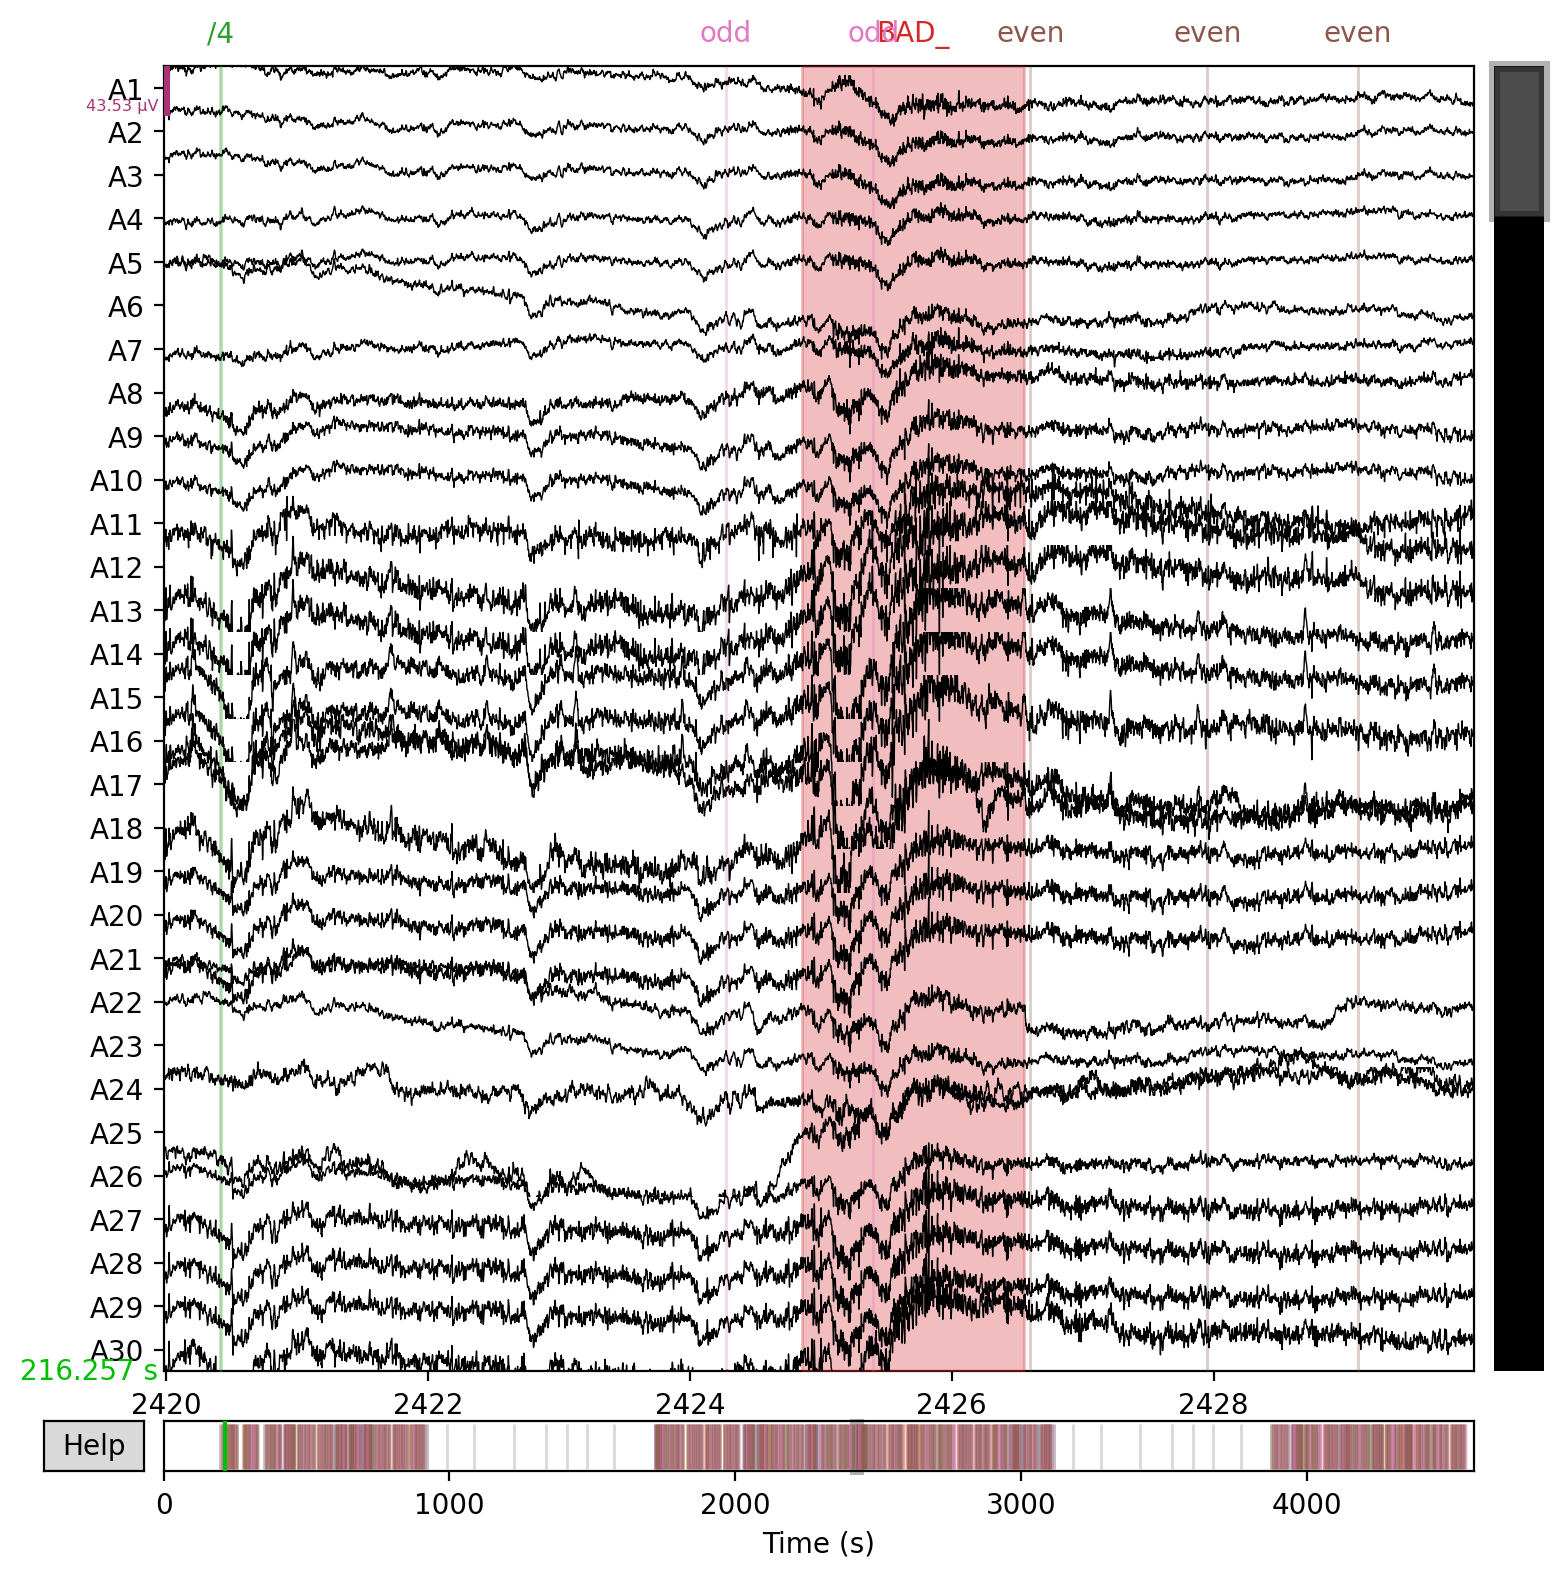

In [12]:
# Now manually mark artifacts
raw_interp.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

# The marked arifacts are now stored as raw_interp.annotations
# Save the data
raw_interp.save(os.path.join(derivPath, f'{saveRoot}preproc-raw.fif'), overwrite=True)

In [4]:
# Load raw_interp from file
raw_interp = mne.io.read_raw_fif(os.path.join(derivPath, f'{saveRoot}preproc-raw.fif'), preload=True)

Opening raw data file /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_preproc-raw.fif...
    Range : 0 ... 2055679 =      0.000 ...  4014.998 secs
Ready.
Opening raw data file /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_preproc-raw-1.fif...
    Range : 2055680 ... 2347007 =   4015.000 ...  4583.998 secs
Ready.
Reading 0 ... 2347007  =      0.000 ...  4583.998 secs...


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   21.2s finished


Using matplotlib as 2D backend.
Channels marked as bad:
none


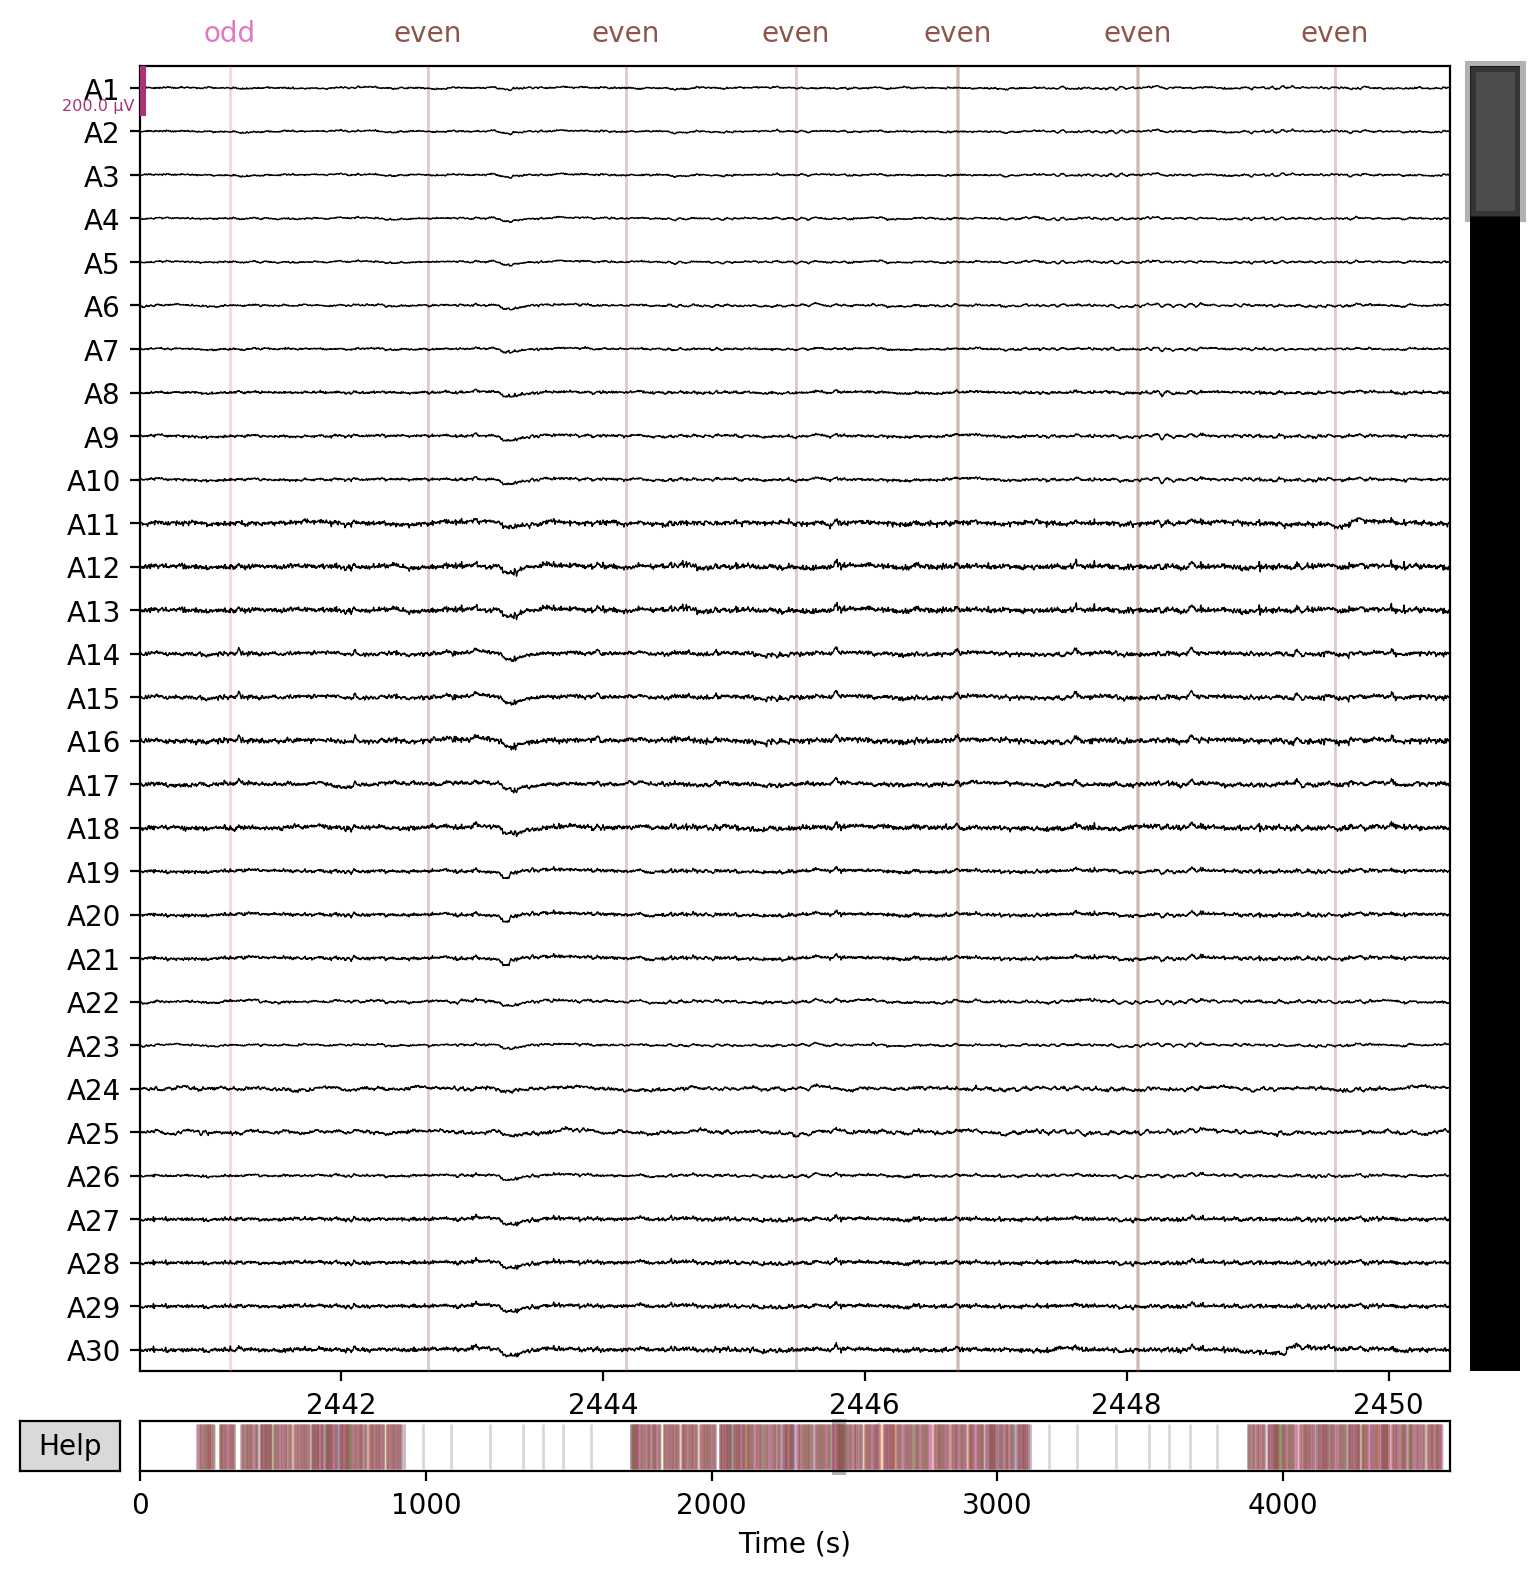

In [6]:
# Visualize the data
raw_interp_copy = raw_interp.copy()
raw_interp_copy.filter(l_freq=1, h_freq=None, n_jobs=-1)
raw_interp_copy.plot(n_channels=30, block=True, scalings=dict(eeg=100e-6, eog=200e-6), show=True)

In [8]:
# Performing ICA
# ... without eye channels
raw_avg_eeg = raw_interp.copy()
raw_avg_eeg.load_data()

# Exclude EOG (eye channels) by selecting only EEG channels
raw_avg_eeg.pick_types(eeg=True, eog=False)

# High pass filter data at 1Hz for ICA preparation
raw_avg_eeg.filter(l_freq=1, h_freq=None, n_jobs=-1)

# Transfer annotations from raw_interp to raw_avg_eeg
raw_avg_eeg.set_annotations(raw_interp.annotations)

# Perform ICA
ica = mne.preprocessing.ICA(n_components=None, random_state=42, method='fastica', max_iter='auto')
ica.fit(raw_avg_eeg, reject_by_annotation=True)

# Save ICA
ica.save(os.path.join(derivPath, f'{saveRoot}ica.fif'))

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   21.8s finished


Fitting ICA to data using 256 channels (please be patient, this may take a while)
Omitting 1783 of 2347008 (0.08%) samples, retaining 2345225 (99.92%) samples.
Selecting by non-zero PCA components: 240 components
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R

/opt/anaconda3/envs/eegmeg/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 12956.2s.
Writing ICA solution to /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_ica.fif...


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,1000 iterations on raw data (2345225 samples)
ICA components,240
Available PCA components,256
Channel types,eeg
ICA components marked for exclusion,—


In [5]:
# Load ica
ica = mne.preprocessing.read_ica(os.path.join(derivPath, f'{saveRoot}ica.fif'))

Reading /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_ica.fif ...
Now restoring ICA solution ...
Ready.


In [12]:
# Visualize ICA components
# ica.plot_components(picks=range(20), ch_type='eeg')

# Bad components 0, 3
ica.exclude = [0, 3]

# Apply ICA to raw data
raw_clean = raw_interp.copy()
ica.apply(raw_clean)

# Save the data
raw_clean.save(os.path.join(derivPath, f'{saveRoot}clean-raw.fif'), overwrite=True)

Applying ICA to Raw instance
    Transforming to ICA space (240 components)
    Zeroing out 2 ICA components
    Projecting back using 256 PCA components
Writing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_clean-raw.fif
Closing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_clean-raw.fif
Writing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_clean-raw-1.fif
Closing /Users/mrugankdake/Library/CloudStorage/GoogleDrive-mdd9787@nyu.edu/My Drive/Coursework/EEG MEG methods/ClassData/EEGBids/derivatives/mrugank/preprocessing/sub-004/sub-004_task-oddball_clean-raw-1.fif
[done]


In [76]:
# ERP analysis
# Epoch data around the semantic visual stimulus
import numpy as np

# Apply low pass filter
raw_clean.filter(l_freq=None, h_freq=15, n_jobs=-1)
# Convert annotations to events using these descriptions
events, event_dict = mne.events_from_annotations(raw_clean)

# Update duration in events
for i, evtIdx in enumerate(events):
    if evtIdx[2] not in [5, 6]:  # Skip events with code 5 or 6
        # Check if there is any event after that is not 5 or 6
        nextEvents = events[i+1:]
        # Check if there are any events after the current event that are not 5 or 6
        isNextEvent = False
        for nextEvt in nextEvents:
            if nextEvt[2] not in [5, 6]:
                isNextEvent = True
                break
        if isNextEvent:
            # Update duration
            events[i, 1] = nextEvt[0] - evtIdx[0]
        else:
            # Update duration
            events[i, 1] = raw_clean.times[-1] - evtIdx[0]

    else:
        # Check if there is any event after 
        nextEvents = events[i+1:]
        if len(nextEvents) > 0:
            events[i, 1] = nextEvents[0, 0] - evtIdx[0]
        else:
            events[i, 1] = raw_clean.times[-1] - evtIdx[0]

semantic_vis_blocks = events[events[:, 2] == 2] # 2 is the event code for semanticVis
semantic_aud_blocks = events[events[:, 2] == 3] # 3 is the event code for semanticAud

# Filter trial events ('even' and 'odd') that occur within semanticVis blocks
semantic_vis_events = []
semantic_aud_events = []
for event in events:
    if event[2] in [int(event_dict['even']), int(event_dict['odd'])]:
        # Check if the trial event occurs within any semanticVis block
        for block in semantic_vis_blocks:
            if block[0] <= event[0] <= block[0] + int(block[1]):  # Ensure event is within block duration
                semantic_vis_events.append(event)
                break

for event in events:
    if event[2] in [int(event_dict['even']), int(event_dict['odd'])]:
        for block in semantic_aud_blocks:
            if block[0] <= event[0] <= block[0] + int(block[1]):
                semantic_aud_events.append(event)
                break



# Convert to numpy array for creating epochs
semantic_vis_events = np.array(semantic_vis_events)
semantic_aud_events = np.array(semantic_aud_events)

# Create epochs from -2 to +3 seconds relative to each trial onset within the block
epochsVis = mne.Epochs(
    raw_clean,
    events=semantic_vis_events,
    event_id={'even': int(event_dict['even']), 'odd': int(event_dict['odd'])},
    tmin=-0.3,
    tmax=1,
    baseline=(None, 0)  # Adjust baseline as needed
)
epochAud = mne.Epochs(
    raw_clean,
    events=semantic_aud_events,
    event_id={'even': int(event_dict['even']), 'odd': int(event_dict['odd'])},
    tmin=-0.3,
    tmax=1,
    baseline=(None, 0)  # Adjust baseline as needed
)

# Plot ERP
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

epochsVis.average().plot(axes=axes[0], show=False)
axes[0].set_title('Visual ERP')

epochAud.average().plot(axes=axes[1], show=False)
axes[1].set_title('Auditory ERP')

plt.show()


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 451 samples (0.881 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   24.9s finished


Used Annotations descriptions: ['/1', '/2', '/4', '/8', 'even', 'odd', 'storySeg']
Not setting metadata
540 matching events found
Setting baseline interval to [-0.30078125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
450 matching events found
Setting baseline interval to [-0.30078125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
